<a href="https://colab.research.google.com/github/constantinouelenios-IB2AD0/constantinouelenios-IB2AD0-DataScience-GenAI-Submissions/blob/main/5_01_Random_Forest_and_GBDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 5.01 Random Forest and Gradient Boosting Decision Trees
In this notebook we will extend the solution to last week's notebook by also looking at Random Forest and two GBDT implementations (the native scikit-learn implementation and also _eXtreme Gradient Boosting Decision Trees_ - _XGBDT_). The latter is basically a slighly more sophisticated implementation.

We start with a prepared dataset available on my.wbs:




In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

### Step 1: Mount your Google Drive

Run the following cell to connect your Google Drive. You will be prompted to grant Colab permission to access your Drive files. Follow the link, choose your Google account, and copy the authorization code back into the input box in Colab.

In [ ]:
from google.colab import drive
drive.mount('https://drive.google.com/file/d/1pqpjCPgbcyhNR5ToIfKtvEFnTEhi6hbG/view?usp=sharing')

ValueError: Mountpoint must be in a directory that exists

### Step 2: Read your file from Google Drive

Once your Drive is mounted, you can access your files via the path `/content/drive/MyDrive/`. For example, if your file `credit_data_final.csv` is directly in your 'My Drive' folder, you can read it like this. **Remember to replace `your_file_name.csv` with the actual name and path of your file within your Google Drive.**

First, we need to install the `gdown` library to download files directly from Google Drive share links.

In [ ]:
!pip install gdown -q

Now, we can download your `credit_data_final.csv` file using its shared link. This will save the file directly into your Colab environment.

In [ ]:
import gdown
import pandas as pd

file_id = '1pqpjCPgbcyhNR5ToIfKtvEFnTEhi6hbG' # Extracted from your provided URL
output_filename = 'credit_data_final.csv'

gdown.download(id=file_id, output=output_filename, quiet=False)

df = pd.read_csv(output_filename)
display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1pqpjCPgbcyhNR5ToIfKtvEFnTEhi6hbG
To: /content/credit_data_final.csv
100%|██████████| 110k/110k [00:00<00:00, 31.6MB/s]


,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,housing,existing_credits,...,type__none,type__life insurance,type__no known property,type__real estate,type__skilled,type__unemp/unskilled non res,type__unskilled resident,type__none.1,type__stores,gender
0,0.333333,0.029412,0.050567,0.00,1.00,1.000000,1.000000,0.857143,1.0,0.333333,...,1,0,0,1,1,0,0,1,0,0
1,0.666667,0.647059,0.313690,0.25,0.50,0.333333,0.333333,0.053571,1.0,0.000000,...,1,0,0,1,1,0,0,1,0,1
2,0.000000,0.117647,0.101574,0.25,0.75,0.333333,0.666667,0.535714,1.0,0.000000,...,1,0,0,1,0,0,1,1,0,0
3,0.333333,0.558824,0.419941,0.25,0.75,0.333333,1.000000,0.464286,0.0,0.000000,...,0,1,0,0,1,0,0,1,0,0
4,0.333333,0.294118,0.254209,0.25,0.50,0.666667,1.000000,0.607143,0.0,0.333333,...,1,0,1,0,1,0,0,1,0,0


In [ ]:
import pandas as pd

# Replace 'your_file_name.csv' with the actual path to your file in Google Drive
# For example: '/content/drive/MyDrive/credit_data_final.csv' or
# '/content/drive/MyDrive/your_folder/credit_data_final.csv'
df = pd.read_csv('/content/drive/MyDrive/credit_data_final.csv')

display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/credit_data_final.csv'

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('credit_data_final.csv')

y_value = df['class'] # set the y
y_values = np.ravel(y_value) # change to an array (list)

x_values = df.drop('class', axis=1) # drop the y from the dataframe

# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 28)
(200, 28)
(800,)
(200,)


## Modeling and Evaluation
We will set up algorithms for logistic regression (the previous winner) and then our new algorithms.

Just to look at the impact of hyperparameter optimisation, we will set them up initially with default hyperparameters and compare their performance (on the training data):

In [ ]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from xgboost import XGBClassifier as XGB
from sklearn.metrics import precision_recall_fscore_support

LogR_algo = LogR()
LogR_model = LogR_algo.fit(X_train, Y_train)

RF_algo = RF()
RF_model = RF_algo.fit(X_train, Y_train)

GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

XGB_algo = XGB()
XGB_model = XGB_algo.fit(X_train, Y_train)

models = [LogR_model, RF_model, GBDT_model, XGB_model]
names = ['Logistic Regression', 'Random Forest', 'GBDT', 'XGBDT']

for i in range(4):
  print(f"Model: {names[i]}")

  # predict based on training data
  predict = models[i].predict(X_train)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.695493494128848
Macro Recall: 0.6145833333333334
Macro F1-score: 0.6216980598450139


Model: Random Forest
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0


Model: GBDT
Macro Precision: 0.8988486842105263
Macro Recall: 0.8464285714285714
Macro F1-score: 0.8668188736681888


Model: XGBDT
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0




Random Forest and XGBDT score perfectly - but is it overfitting? Let's hyperparameter tune them and see the scores again (on training data):

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# we get a load of warnings running the code so will supress them
import warnings
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_

# Logistic Regression
LogR_tuned_parameters = {
    'solver': ['liblinear'], # only this one as it does both L1 and L2
    # C is the equivalent of alpha in L1/L2 regression - how much regularisation
    'C': uniform(loc=0.1, scale=19.9),  # Draw from a uniform distribution between 0.1 and 20
    'penalty': ['l1', 'l2', 'elasticnet', None] # elasticnet is a mix of L1 and L2
}

LogR_best_params = random_search(LogR_algo, LogR_tuned_parameters, X_train, Y_train)


# Random Forest
RF_tuned_parameters = {
    'n_estimators': randint(50, 500), # Draw from a uniform distribution between 50 and 500
    'max_depth': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'min_samples_split': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'max_features': ['sqrt', 'log2', None]
}

RF_best_params = random_search(RF_algo, RF_tuned_parameters, X_train, Y_train)


# GBDT
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

GBDT_best_params = random_search(GBDT_algo, GBDT_tuned_parameters, X_train, Y_train)


# XGBDT
XGB_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    # eta is learning rate
    'eta': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    # objective is the same as criterion
    'objective': ['binary:logistic', 'binary:hinge'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

XGB_best_params = random_search(XGB_algo, XGB_tuned_parameters, X_train, Y_train)


# Train the models
LogR_algo = LogR(**LogR_best_params)
LogR_model = LogR_algo.fit(X_train, Y_train)

RF_algo = RF(**RF_best_params)
RF_model = RF_algo.fit(X_train, Y_train)

GBDT_algo = GBDT(**GBDT_best_params)
GBDT_model = GBDT_algo.fit(X_train, Y_train)

XGB_algo = XGB(**XGB_best_params)
XGB_model = XGB_algo.fit(X_train, Y_train)


# score the models
models = [LogR_model, RF_model, GBDT_model, XGB_model] # redo this or it uses the old models

for i in range(len(models)): # for every model in the models list
  print(f"Model: {names[i]}")

  # predict based on training data
  predict = models[i].predict(X_train)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.6981523631008166
Macro Recall: 0.6211309523809524
Macro F1-score: 0.629761289933129


Model: Random Forest
Macro Precision: 0.8548795944233207
Macro Recall: 0.5229166666666667
Macro F1-score: 0.4589470140195335


Model: GBDT
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0


Model: XGBDT
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0




Our scores are ... a bit different from last time. In fact GBDT went up to perfect. However, the real test is the score on our test data:

In [ ]:
for i in range(4):
  print(f"Model: {names[i]}")

  # predict based on TEST data
  predict = models[i].predict(X_test)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.6376488095238095
Macro Recall: 0.5880952380952381
Macro F1-score: 0.590626764539808


Model: Random Forest
Macro Precision: 0.8553299492385786
Macro Recall: 0.525
Macro F1-score: 0.4630493146813622


Model: GBDT
Macro Precision: 0.753411306042885
Macro Recall: 0.6857142857142857
Macro F1-score: 0.7026625219624274


Model: XGBDT
Macro Precision: 0.6741164241164241
Macro Recall: 0.6595238095238095
Macro F1-score: 0.6651785714285714




Similar to last time, our best scorer for our prefered metric (_macro precision_) scores worse for everything else. We can make a good case to look further at both Random Forest and GBDT. So let's do that:

Random Forest Confusion Matrix


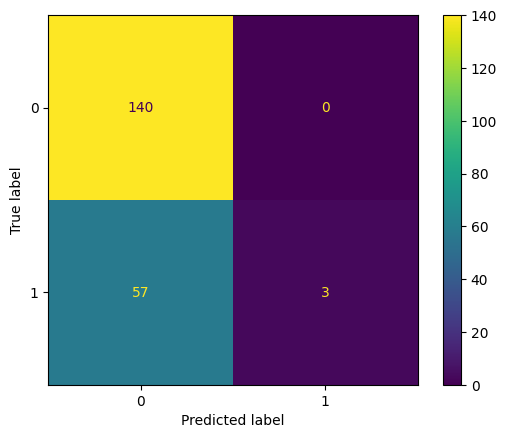

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# Random Forest
print("Random Forest Confusion Matrix")
predict = RF_model.predict(X_test)
CM.from_predictions(Y_test, predict)

GBDT Confusion Matrix


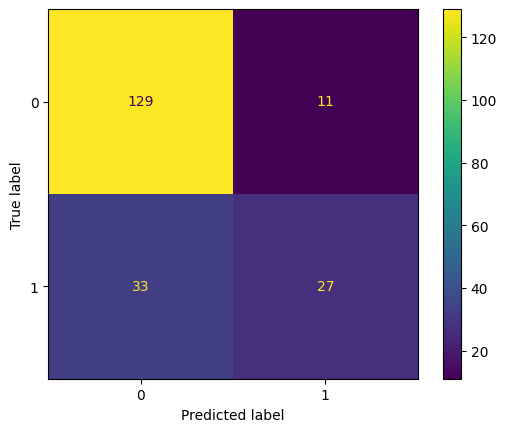

In [ ]:
# GBDT
print("GBDT Confusion Matrix")
predict = GBDT_model.predict(X_test)
print(CM.from_predictions(Y_test, predict))

## Key Data Science Processes and Features Used in This Project

Here's a summary of the data science steps and tools employed in this notebook, which can serve as a reference for future projects:

**1. Data Loading & Access:**
*   **Goal:** Get your data into the Colab environment.
*   **Features Used:**
    *   `google.colab.files.upload()`: For interactive file uploads from your local machine. (Note: Can sometimes be sensitive to browser/file size).
    *   `gdown` library: To download files directly from Google Drive shareable links using their `file_id`. This is efficient for direct links.
    *   `pandas.read_csv()`: To load data from a CSV file into a pandas DataFrame, which is a tabular data structure.

**2. Data Preparation & Splitting:**
*   **Goal:** Format your data for machine learning model training and create separate sets for training and evaluating your models.
*   **Features Used:**
    *   Identifying features (`X`) and target variable (`y`): Separating the independent variables (features) used for prediction from the dependent variable (target) to be predicted.
    *   `numpy.ravel()`: To flatten the target variable into a 1D array, a common requirement for target variables in scikit-learn.
    *   `sklearn.model_selection.train_test_split()`: To divide the dataset into training and testing subsets. Key parameters include:
        *   `test_size`: Defines the proportion of the dataset allocated to the test set.
        *   `random_state`: Ensures that the data split is reproducible across different runs.
        *   `stratify`: Used to maintain the same proportion of classes in both the training and testing sets, particularly useful for imbalanced datasets.

**3. Model Selection:**
*   **Goal:** Choose appropriate machine learning algorithms based on the problem (e.g., classification).
*   **Features Used:**
    *   `LogisticRegression` (from `sklearn.linear_model`): A fundamental linear model suitable for binary classification tasks.
    *   `RandomForestClassifier` (from `sklearn.ensemble`): An ensemble learning method that builds multiple decision trees and combines their outputs for improved accuracy and robustness.
    *   `GradientBoostingClassifier` (from `sklearn.ensemble`): Another powerful ensemble method that builds decision trees sequentially, with each new tree correcting the errors of the previous ones.
    *   `XGBClassifier` (from `xgboost`): An optimized and highly efficient implementation of gradient boosting, known for its performance and speed.

**4. Model Training:**
*   **Goal:** Teach the chosen models to learn patterns and relationships from the training data.
*   **Features Used:**
    *   `.fit(X_train, Y_train)`: The standard method in scikit-learn (and compatible libraries) to train a model. It takes the training features (`X_train`) and their corresponding true labels (`Y_train`) as input.

**5. Model Evaluation:**
*   **Goal:** Quantitatively assess how well your trained models are performing and generalizing to new data.
*   **Features Used:**
    *   `.predict(X_data)`: Used to generate predictions from a trained model on a given set of input features (either training or test data).
    *   `sklearn.metrics.precision_recall_fscore_support()`: Calculates classification metrics including precision, recall, and F1-score. Using `average='macro'` computes these metrics independently for each class and then averages them, treating all classes equally.
    *   `sklearn.metrics.ConfusionMatrixDisplay.from_predictions()`: Provides a visual representation of the confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives, offering deep insights into model error types.

**6. Hyperparameter Tuning:**
*   **Goal:** Optimize the performance of your machine learning models by systematically searching for the best combination of their configurable parameters (hyperparameters).
*   **Features Used:**
    *   `sklearn.model_selection.RandomizedSearchCV()`: An efficient method for hyperparameter optimization that randomly samples a fixed number of parameter settings from specified distributions. This is often preferred over `GridSearchCV` for large search spaces.
        *   `cv`: Specifies the number of folds for cross-validation during the search.
        *   `random_state`: Ensures the reproducibility of the random sampling process.
        *   `scoring`: Defines the metric that `RandomizedSearchCV` will use to evaluate and choose the best performing model (e.g., `'precision_macro'` in our case).
        *   `n_iter`: Sets the number of different parameter combinations to try.
        *   `refit=True`: After finding the best parameters, the estimator is retrained on the entire dataset with those optimal parameters.
    *   `scipy.stats.uniform`, `scipy.stats.randint`: These functions from the SciPy library are used to define continuous (e.g., for `learning_rate`) and discrete (e.g., for `n_estimators`, `max_depth`) probability distributions from which hyperparameters are sampled during `RandomizedSearchCV`.

We can see they are wrong in different ways. Because we care most about minimising cases we predict "0" (good to loan to) and in fact they are a "1" (bad to loan to), GBDT should be best. Random Forest misclassifies 56 cases in this way (more than Logistic Regression), while GBDT only 31. Also, random forest only predicts "1" a total of 4 times. GBDT is much more balanced in the predictions it makes for each class.

So GBDT is the winner.
